# Question 1 - Data Preparation [20 points]

In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib as mpl
## To check if the file exist in local, we should import this
from os.path import exists
import pickle

/Users/ShuyanLi/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
## get data from website link
base_url = "https://www.eia.gov/consumption/residential/data/"

In [3]:
## get link from the website
url_2015 = base_url + "2015/csv/recs2015_public_v4.csv"
## Use pandas to read data directly from the URL
df_2015 = pd.read_csv(url_2015)
## make column names in lower case and display year 2015 recs file
df_2015 = df_2015.rename(columns=str.lower)

In [4]:
## get link from the website
url_2009 = base_url + "2009/csv/recs2009_public.csv"
## Use pandas to read data directly from the URL
df_2009 = pd.read_csv(url_2009)
## make column names in lower case and display year 2009 recs file
df_2009 = df_2009.rename(columns=str.lower)

/Users/ShuyanLi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (717,718) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
## get link from the website
url_2009_weight = base_url + "2009/csv/recs2009_public_repweights.csv"
## Use pandas to read data directly from the URL
df_2009_weight = pd.read_csv(url_2009_weight)
## make column names in lower case and display year 2009 recs weight file
df_2009_weight = df_2009_weight.rename(columns=str.lower)

Perform the requirement in question 1: 

Structure your code to use `exists` from the (built-in) `sys` module so the data are only downloaded when not already available locally.

In [6]:
def getdata(file_path, file_name, download_to_local):
    """
    Function getdata tests the input file is available locally and return data we want.

    Parameters
    ----------
    file_path: string
               It is a local file path.
    file_name: string
               It is the name of the file we want to get access to.
    download_to_local: boolean
               True if we want to download the file. False if we do not want download the data.
    

    Returns
    -------
    A dataframe that is the same as file_name.

    """
    
    if (file_name == "df_2009_weight"):
        if exists(file_path+'df_2009_weight.pkl'):
            print("The file is already in your local path!")
            with open(file_path+'df_2009_weight.pkl', 'rb') as f:
                data = pickle.load(f)
            return(data)
        else:
            print("The file is downloading to your preferred file path...")
            ## get link from the website
            url_2009_weight = base_url + "2009/csv/recs2009_public_repweights.csv"
            ## Use pandas to read data directly from the URL
            df_2009_weight = pd.read_csv(url_2009_weight)
            ## make column names in lower case and display year 2009 recs weight file
            df_2009_weight = df_2009_weight.rename(columns=str.lower)
            if (download_to_local == True):
                ## download 'df_2009_weight' to local
                df_2009_weight.to_pickle(file_path+'df_2009_weight.pkl')
            return df_2009_weight
    elif (file_name == "df_2009"):
        if exists(file_path+'df_2009.csv'):
            print("The file is already in your local path!")
            with open(file_path+'df_2009.pkl', 'rb') as f:
                data = pickle.load(f)
            return(data)
        else:
            print("The file is downloading to your preferred file path...")
            ## get link from the website
            url_2009 = base_url + "2009/csv/recs2009_public.csv"
            ## Use pandas to read data directly from the URL
            df_2009 = pd.read_csv(url_2009)
            ## make column names in lower case and display year 2009 recs file
            df_2009 = df_2009.rename(columns=str.lower)
            if (download_to_local == True):
                ## download 'df_2009' to local
                df_2009.to_pickle(file_path+'df_2009_weight.pkl')
            return df_2009_weight
    elif (file_name == "df_2015"):
        if exists(file_path+'df_2015.csv'):
            print("The file is already in your local path!")
            with open(file_path+'df_2015.pkl', 'rb') as f:
                data = pickle.load(f)
            return(data)
        else:
            print("The file is downloading to your preferred file path...")
            ## get link from the website
            url_2015 = base_url + "2015/csv/recs2015_public.csv"
            ## Use pandas to read data directly from the URL
            df_2015 = pd.read_csv(url_2015)
            ## make column names in lower case and display year 2015 recs file
            df_2015 = df_2015.rename(columns=str.lower)
            if (download_to_local == True):
                ## download 'df_2015' to local
                df_2015.to_pickle(file_path+'df_2009_weight.pkl')
            return df_2015
    else:
        print("There is no such file!!!")

In [7]:
## Demo of how to use Function getdata(file_path, file_name, download_to_local)
getdata(file_path = "/Users/ShuyanLi/Desktop/", file_name = "df_2009_weight", download_to_local = True)

The file is already in your local path!


,doeid,nweight,brr_weight_1,brr_weight_2,brr_weight_3,brr_weight_4,brr_weight_5,brr_weight_6,brr_weight_7,brr_weight_8,...,brr_weight_235,brr_weight_236,brr_weight_237,brr_weight_238,brr_weight_239,brr_weight_240,brr_weight_241,brr_weight_242,brr_weight_243,brr_weight_244
0,1,2471.679705,3628.305158,1392.373673,1271.181424,3528.052756,3478.045539,1164.560766,1215.035282,1204.172316,...,1390.318940,1134.968007,1195.730023,1304.300183,1248.137817,1230.150977,1157.195411,1156.412430,1240.217824,3655.101693
1,2,8599.172010,4408.308000,4247.696575,4450.561135,13207.910560,4178.691121,4271.613426,4219.739488,4229.454405,...,12811.288200,4236.006271,12779.722250,12680.646870,13172.272250,13656.849190,4246.979562,13134.213440,12624.316870,12846.242170
2,3,8969.915921,13664.732100,13655.213030,4359.190122,13086.068610,13721.970010,13459.082130,4749.199418,4689.040317,...,12170.897940,12829.708110,13637.133920,13098.702000,12569.565770,14155.301240,5008.801785,5256.419281,13201.724800,4812.600110
3,4,18003.639600,9456.435434,25723.464490,25125.994190,9334.577574,28340.387380,8659.271182,9079.577826,9200.147549,...,8519.486929,24214.978000,9840.195847,26856.650810,25453.890870,8483.396618,26383.441980,26510.027830,27188.612470,9534.025088
4,5,5999.605242,8659.554041,3269.734038,2910.690905,2798.774832,8544.785536,3091.628917,2939.910109,3251.644196,...,2648.413487,7770.479222,3206.892604,8274.644460,2920.173900,3005.523507,9469.217579,3427.954293,3218.392309,3251.371247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,12079,10219.802880,4971.444986,5118.738130,16323.838600,16114.371840,15516.980350,4729.643641,14820.087660,15909.196600,...,4641.168902,15373.360120,5398.060666,5190.461411,14353.431130,4458.883796,16606.352160,15397.944010,15886.510090,15669.237850
12079,12080,8689.074445,13379.958700,12643.430680,4925.686838,3901.787982,4453.946818,4518.165817,13984.737830,12786.838190,...,13724.315210,4774.309762,4421.945515,13766.511860,12309.989790,12649.677120,13862.104570,4383.465655,13033.819830,3976.693639
12080,12081,4697.213624,2344.955794,7032.330646,2361.206603,7039.214013,2445.940157,2271.017810,6699.021505,7028.675252,...,2405.426480,6985.802482,6828.306201,2382.442743,2376.716399,2352.500819,6853.585876,2272.806556,6854.803388,2479.082636
12081,12082,13155.678790,6701.717641,7013.500661,6372.473843,6930.883853,6899.686416,6467.124670,19294.640290,6433.589904,...,6547.815677,6959.110117,19090.172760,6699.440676,6687.420209,20062.409940,20375.068830,19478.810910,6721.075376,17663.466590


## part a)

Separately for 2009 and 2015, construct datasets containing just the minimal necessary variables identified in the warmup, excluding the replicate weights. Choose an appropriate format for each of the remaining columns, particularly by creating categorical types where appropriate.

In [19]:
## There are five variables we are interested related to this question:
## 'DOEID', 'REGIONC', 'HDD65', 'CDD65', 'NWEIGHT'
## Then, we create two new dataframes to store these variables for year 2009 and 2015
df_2009_new = df_2009[['doeid', 'regionc', 'hdd65', 'cdd65', 'nweight']]
df_2015_new = df_2015[['doeid', 'regionc', 'hdd65', 'cdd65', 'nweight']]

In [20]:
df_2009_new.dtypes

doeid        int64
regionc      int64
hdd65        int64
cdd65        int64
nweight    float64
dtype: object

We need to change "REGIONC" column type into "categorical". The other column format is appropriate.

In [21]:
df_2009_new['regionc'] = pd.Categorical(df_2009_new['regionc'].replace({
    1:"Northeast Census Region",
    2:"Midwest Census Region",
    3:"South Census Region",
    4:"West Census Region"
}))
df_2015_new['regionc'] = pd.Categorical(df_2015_new['regionc'].replace({
    1:"Northeast Census Region",
    2:"Midwest Census Region",
    3:"South Census Region",
    4:"West Census Region"
}))

/Users/ShuyanLi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/ShuyanLi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [22]:
## display year 2009 dataframe only containing variables we are interested in
df_2009_new.dtypes

doeid         int64
regionc    category
hdd65         int64
cdd65         int64
nweight     float64
dtype: object

In [23]:
## display year 2015 dataframe only containing variables we are interested in
df_2015_new.dtypes

doeid         int64
regionc    category
hdd65         int64
cdd65         int64
nweight     float64
dtype: object

## part b)

Separatley for 2009 and 2015, construct datasets containing just the unique case ids and the replicate weights (not the primary final weight) in a “long” format with one weight and residence per row.

For 2009:

In [24]:
## create the brr_weight2009_list containing "DOEID" and all "brr_weight" names
brr_weight2009_list = ["doeid"]
## create the weight_number2009_list containing numbers from 1 to 244
weight_number2009_list = []
for i in range(1,245):
    weight_number2009_list.append(i)
    brr_weight2009_list.append("brr_weight_"+str(i))

In [25]:
brr_weight2009 = df_2009_weight[brr_weight2009_list]
brr_weight2009_long = brr_weight2009.set_index(['doeid'])
brr_weight2009_long.columns = [len(weight_number2009_list)*['2009_rep_weights'], 1*weight_number2009_list]
brr_weight2009_long.columns.names = (None, 'brr_weight_number')
brr_weight2009_long = brr_weight2009_long.stack()
brr_weight2009_long.reset_index(inplace=True)
brr_weight2009_long = brr_weight2009_long[['doeid', '2009_rep_weights', 'brr_weight_number']]
new_col = ['id', 'replicated weights','No. brr weight']
brr_weight2009_long.columns = new_col
## display datasets containing just the unique case ids and the replicate weights of year 2009
brr_weight2009_long

,id,replicated weights,No. brr weight
0,1,3628.305158,1
1,1,1392.373673,2
2,1,1271.181424,3
3,1,3528.052756,4
4,1,3478.045539,5
...,...,...,...
2948247,12083,4078.087647,240
2948248,12083,11413.759630,241
2948249,12083,3922.022777,242
2948250,12083,3769.761968,243


For 2015:

In [26]:
## create the brr_weight2015_list containing "DOEID" and all "BRRWT" names
brr_weight2015_list = ["doeid"]
## create the weight_number2015_list containing numbers from 1 to 96
weight_number2015_list = []
## search the 2015 rec file, we find 96 brr_weight data
for i in range(1,97):
    weight_number2015_list.append(i)
    brr_weight2015_list.append("brrwt"+str(i))

In [27]:
brr_weight2015 = df_2015[brr_weight2015_list]
brr_weight2015_long = brr_weight2015.set_index(['doeid'])
brr_weight2015_long.columns = [len(weight_number2015_list)*['2015_rep_weights'], 1*weight_number2015_list]
brr_weight2015_long.columns.names = (None, 'brr_weight_number')
brr_weight2015_long = brr_weight2015_long.stack()
brr_weight2015_long.reset_index(inplace=True)
brr_weight2015_long = brr_weight2015_long[['doeid', '2015_rep_weights', 'brr_weight_number']]
new_col = ['id', 'replicated weights','No. brr weight']
brr_weight2015_long.columns = new_col
## display datasets containing just the unique case ids and the replicate weights of year 2015
brr_weight2015_long

,id,replicated weights,No. brr weight
0,10001,16555.311270,1
1,10001,5938.014320,2
2,10001,17725.586130,3
3,10001,17635.591890,4
4,10001,6032.801451,5
...,...,...,...
545851,15686,19431.499680,92
545852,15686,16265.331380,93
545853,15686,48271.650850,94
545854,15686,18825.206440,95


# Question 2 - Construct and report the estimates [45 points]

## part a)

In [28]:
## From recs data
R_2009 = 244
R_2015 = 96
## epsilon is Fay coefficient, We set it as 0.5
epsilon = 0.5
## alpha is confidence level
## We want to get 95% confidence interval, so we set it as 1.96
alpha = 1.96

Estimate the average number of heating and cooling degree days for residences in each Census region for both 2009 and 2015. You should construct both point estimates (using the weights) and 95% confidece intervals (using standard errors estiamted with the repliacte weights). Report your results in a nicely formatted table.

For this question, you should use pandas DataFrame methods wherever possible. Do not use a module specifically supporting survey weighting.

### First, we deal with year 2009 data:
1) In this part we will get the average number of heating and cooling degree days for residences in each Census region for 2009. 

2) Then we will construct both point estimates (using the weights) and 95% confidece intervals and store them in DataFrame `merged_2009` .

3) At last we report the results in a nicely formatted table.

In [29]:
## import df_2009_new including variables: doeid, regionc, hdd65, cdd65, nweight
## df_2009_new is created in Question1 (a)
df_2009_nwt = df_2009_new

## We multiple every hdd and cdd with its nweight
df_2009_nwt['nwt_hdd65'] = df_2009_nwt['hdd65'] * df_2009_nwt['nweight']
df_2009_nwt['nwt_cdd65'] = df_2009_nwt['cdd65'] * df_2009_nwt['nweight']

/Users/ShuyanLi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ShuyanLi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [30]:
## calculate year 2009's theta hat after grouped by 'regionc'
grouped_2009 = df_2009_nwt.groupby('regionc').sum().reset_index()

## calculate average number of heating and cooling degree days in each Census region
grouped_2009['avg_hdd'] = (grouped_2009['nwt_hdd65']/grouped_2009['nweight']).round(2)
grouped_2009['avg_cdd'] = (grouped_2009['nwt_cdd65']/grouped_2009['nweight']).round(2)

## output the average number of heating and cooling degree days in each Census region
#grouped_2009[['regionc', 'avg_hdd', 'avg_cdd']]

For 2009 HDD $\hat\theta_R$:

In [53]:
## substract year 2009's all brr_weight and put them into dataframe weight_2009
weight_2009 = df_2009_weight.loc[:, "brr_weight_1":"brr_weight_244"]
## generate a dataframe to store year 2009's brr_weight with their regionc
weight_2009_region = pd.concat([df_2009_new['regionc'], weight_2009], axis=1)
weight_2009_region = weight_2009_region.groupby('regionc').sum().reset_index()
## exclude column 'regionc'
weight_2009_region = weight_2009_region.loc[:, "brr_weight_1":"brr_weight_244"]
## multiply the two dataframe, and get every brr_weight * hdd
hdd_bw_product_2009 = weight_2009.multiply(df_2009_new['hdd65'].values, axis='rows')
## Add column 'regionc' to hdd_bw_product_2009
df_region_brr_2009 = pd.concat([df_2009_new[['regionc']], hdd_bw_product_2009], axis=1)
## groupby 'regionc'
df1 = df_region_brr_2009.groupby('regionc').sum()
df2 = df1.reset_index()
## subtract all brr_weighted data(thetaR_hat)
df3 = df2.loc[:, "brr_weight_1":"brr_weight_244"]
df4 = df3/weight_2009_region
## thetaR_hat - hdd_theta_hat
df5 = df4.sub(grouped_2009['avg_hdd'], axis=0)
print(df5)
df6 = df5**2

df6['row_sum'] = df6.apply(lambda x: x.sum(), axis=1)
print(df6)
df6['hdd_region_sd'] = ((df6['row_sum']*(1/(R_2009*(1-epsilon)**2)))**(1/2)).round(2)
df6['hdd_lwr'] = (grouped_2009['avg_hdd'] - alpha*df6['hdd_region_sd']).round(2)
df6['hdd_upr'] = (grouped_2009['avg_hdd'] + alpha*df6['hdd_region_sd']).round(2)
## generate a column to store CI
df6['95% CI of heating days'] ="(" + (df6['hdd_lwr']).astype(str) +","+ (df6['hdd_upr']).astype(str) + ")"
## df6 stores hdd_sd
hdd_region_CI = pd.concat([grouped_2009[['avg_hdd']], df6[['95% CI of heating days', 'hdd_region_sd']]], axis=1)

   brr_weight_1  brr_weight_2  brr_weight_3  brr_weight_4  brr_weight_5  \
0    -11.239966     16.466949     21.789991     -9.074005     -3.752657   
1     29.991310     16.578715     36.472760     10.155245     -7.632629   
2     12.601697      3.741749    -17.508847     42.219030    -23.242017   
3      8.172167     57.874971     48.873929     -1.488381    -54.462942   

   brr_weight_6  brr_weight_7  brr_weight_8  brr_weight_9  brr_weight_10  ...  \
0     59.956749     -7.549477      0.893957     16.507143       7.272442  ...   
1      8.888970    -30.757683     21.713298      8.010423     -17.206496  ...   
2     -7.672101      3.341753     28.069685     11.867807      -5.675680  ...   
3     56.864818    -29.791579     -5.450078     19.228992     -42.472931  ...   

   brr_weight_235  brr_weight_236  brr_weight_237  brr_weight_238  \
0       -4.447925      -15.227648       10.869406      -25.240528   
1      -16.785642       -0.579930       27.547095       20.808932   
2       10.

The same for 2009 CDD $\hat\theta_R$:

In [32]:
## substract year 2009's all brr_weight and put them into dataframe weight_2009
weight_2009 = df_2009_weight.loc[:, "brr_weight_1":"brr_weight_244"]
## generate a dataframe to store year 2009's brr_weight with their regionc
weight_2009_region = pd.concat([df_2009_new['regionc'], weight_2009], axis=1)
weight_2009_region = weight_2009_region.groupby('regionc').sum().reset_index()
## exclude column 'regionc'
weight_2009_region = weight_2009_region.loc[:, "brr_weight_1":"brr_weight_244"]
## multiply the two dataframe, and get every brr_weight * cdd
cdd_bw_product_2009 = weight_2009.multiply(df_2009_new['cdd65'].values, axis='rows')
## Add column 'regionc' to cdd_bw_product_2009
df_region_brr_2009 = pd.concat([df_2009_new[['regionc']], cdd_bw_product_2009], axis=1)
## groupby 'regionc'
df1 = df_region_brr_2009.groupby('regionc').sum()
df2 = df1.reset_index()
## subtract all brr_weighted data(thetaR_hat)
df3 = df2.loc[:, "brr_weight_1":"brr_weight_244"]
df4 = df3/weight_2009_region
## thetaR_hat - cdd_theta_hat
df5 = df4.sub(grouped_2009['avg_cdd'], axis=0)
df6 = df5**2
df6['row_sum'] = df6.apply(lambda x: x.sum(), axis=1)
df6['cdd_region_sd'] = ((df6['row_sum']*(1/(R_2009*(1-epsilon)**2)))**(1/2)).round(2)
df6['cdd_lwr'] = (grouped_2009['avg_cdd'] - alpha*df6['cdd_region_sd']).round(2)
df6['cdd_upr'] = (grouped_2009['avg_cdd'] + alpha*df6['cdd_region_sd']).round(2)
## generate a column to store CI
df6['95% CI of cooling days'] ="(" + (df6['cdd_lwr']).astype(str) +","+ (df6['cdd_upr']).astype(str) + ")"
## df6 stores cdd_sd
cdd_region_CI = pd.concat([grouped_2009[['avg_cdd']], df6[['95% CI of cooling days', 'cdd_region_sd']]], axis=1)

In [33]:
## merge 'regionc', year 2009's hdd and cdd
merged_2009 = pd.concat([grouped_2009[['regionc']], hdd_region_CI, cdd_region_CI], axis=1)
newname_merged_2009 = merged_2009[['regionc', 'avg_hdd', '95% CI of heating days', 'avg_cdd', '95% CI of cooling days']]
new_col_2009 = ['regionc', 'average number of heating degree days', '95% CI of heating days', 
                'average number of cooling degree days', '95% CI of cooling days']
newname_merged_2009.columns = new_col_2009

In [49]:
# construct a table, include a caption: ---------------------------------------
cap = """
<b> Table 1.</b> <em> Esitimate average number of heating and cooling degree days in 2009</em>
"""
t1 = newname_merged_2009.to_html(index=False)
t1 = t1.rsplit('\n')
t1.insert(1, cap)
tab1 = ''
for i, line in enumerate(t1):
    tab1 += line
    if i < (len(t1) - 1):
        tab1 += '\n'

display(HTML(tab1))

regionc,average number of heating degree days,95% CI of heating days,average number of cooling degree days,95% CI of cooling days
Midwest Census Region,6325.34,"(6233.77,6416.91)",660.89,"(632.0,689.78)"
Northeast Census Region,5700.99,"(5632.19,5769.79)",680.72,"(660.12,701.32)"
South Census Region,2696.67,"(2615.7,2777.64)",2207.73,"(2150.65,2264.81)"
West Census Region,3259.64,"(3092.53,3426.75)",1328.64,"(1270.23,1387.05)"


### Second, we deal with year 2015 data:
1) In this part we will get the average number of heating and cooling degree days for residences in each Census region for 2015. 

2) Then we will construct both point estimates (using the weights) and 95% confidece intervals and store them in DataFrame `merged_2015` .

3) At last we report the results in a nicely formatted table.

In [35]:
## import df_2015_new including variables: doeid, regionc, hdd65, cdd65, nweight
## df_2015_new is created in Question1 (a)
df_2015_nwt = df_2015_new

## We multiple every hdd and cdd with its nweight
df_2015_nwt['nwt_hdd65'] = df_2015_nwt['hdd65'] * df_2015_nwt['nweight']
df_2015_nwt['nwt_cdd65'] = df_2015_nwt['cdd65'] * df_2015_nwt['nweight']

/Users/ShuyanLi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ShuyanLi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [36]:
## calculate year 2015's theta hat after grouped by 'regionc'
grouped_2015 = df_2015_nwt.groupby('regionc').sum().reset_index()

## calculate average number of heating and cooling degree days in each Census region
grouped_2015['avg_hdd'] = (grouped_2015['nwt_hdd65']/grouped_2015['nweight']).round(2)
grouped_2015['avg_cdd'] = (grouped_2015['nwt_cdd65']/grouped_2015['nweight']).round(2)

## output the average number of heating and cooling degree days in each Census region
#grouped_2015[['regionc', 'avg_hdd', 'avg_cdd']]

For 2015 HDD $\hat\theta_R$:

In [37]:
## substract year 2015's all brr_weight and put them into dataframe weight_2015
weight_2015 = df_2015.loc[:, "brrwt1":"brrwt96"]
## generate a dataframe to store year 2015's brr_weight with their regionc
weight_2015_region = pd.concat([df_2015_new['regionc'], weight_2015], axis=1)
weight_2015_region = weight_2015_region.groupby('regionc').sum().reset_index()
## exclude column 'regionc'
weight_2015_region = weight_2015_region.loc[:, "brrwt1":"brrwt96"]
## Add column 'regionc' to hdd_bw_product_2015
hdd_bw_product_2015 = weight_2015.multiply(df_2015_new['hdd65'].values, axis='rows')
## Add column 'regionc' to hdd_bw_product_2015
df_region_brr_2015 = pd.concat([df_2015_new[['regionc']], hdd_bw_product_2015], axis=1)
## groupby 'regionc'
df1 = df_region_brr_2015.groupby('regionc').sum()
df2 = df1.reset_index()
## subtract all brr_weighted data(thetaR_hat)
df3 = df2.loc[:, "brrwt1":"brrwt96"]
df4 = df3/weight_2015_region
## thetaR_hat - hdd_theta_hat
df5 = df4.sub(grouped_2015['avg_hdd'], axis=0)
df6 = df5**2
df6['row_sum'] = df6.apply(lambda x: x.sum(), axis=1)
df6['hdd_region_sd'] = ((df6['row_sum']*(1/(R_2015*(1-epsilon)**2)))**(1/2)).round(2)
df6['hdd_lwr'] = (grouped_2015['avg_hdd'] - alpha*df6['hdd_region_sd']).round(2)
df6['hdd_upr'] = (grouped_2015['avg_hdd'] + alpha*df6['hdd_region_sd']).round(2)
##generate a column to store CI
df6['95% CI of heating days'] ="(" + (df6['hdd_lwr']).astype(str) +","+ (df6['hdd_upr']).astype(str) + ")"
## df6 stores hdd_sd
hdd_region_CI = pd.concat([grouped_2015[['avg_hdd']], df6[['95% CI of heating days', 'hdd_region_sd']]], axis=1)

The same for 2015 CDD $\hat\theta_R$:

In [38]:
## substract year 2015's all brr_weight and put them into dataframe weight_2015
weight_2015 = df_2015.loc[:, "brrwt1":"brrwt96"]
## generate a dataframe to store year 2015's brr_weight with their regionc
weight_2015_region = pd.concat([df_2015_new['regionc'], weight_2015], axis=1)
weight_2015_region = weight_2015_region.groupby('regionc').sum().reset_index()
## exclude column 'regionc'
weight_2015_region = weight_2015_region.loc[:, "brrwt1":"brrwt96"]
## multiply the two dataframe, and get every brr_weight * cdd
cdd_bw_product_2015 = weight_2015.multiply(df_2015_new['cdd65'].values, axis='rows')
## Add column 'regionc' to cdd_bw_product_2015
df_region_brr_2015 = pd.concat([df_2015_new[['regionc']], cdd_bw_product_2015], axis=1)
## groupby 'regionc'
df1 = df_region_brr_2015.groupby('regionc').sum()
df2 = df1.reset_index()
## subtract all brr_weighted data(thetaR_hat)
df3 = df2.loc[:, "brrwt1":"brrwt96"]
df4 = df3/weight_2015_region
## thetaR_hat - hdd_theta_hat
df5 = df4.sub(grouped_2015['avg_cdd'], axis=0)
df6 = df5**2
df6['row_sum'] = df6.apply(lambda x: x.sum(), axis=1)
df6['cdd_region_sd'] = ((df6['row_sum']*(1/(R_2015*(1-epsilon)**2)))**(1/2)).round(2)
df6['cdd_lwr'] = (grouped_2015['avg_cdd'] - alpha*df6['cdd_region_sd']).round(2)
df6['cdd_upr'] = (grouped_2015['avg_cdd'] + alpha*df6['cdd_region_sd']).round(2)
##generate a column to store CI
df6['95% CI of cooling days'] ="(" + (df6['cdd_lwr']).astype(str) +","+ (df6['cdd_upr']).astype(str) + ")"
## df6 stores hdd_sd
cdd_region_CI = pd.concat([grouped_2015[['avg_cdd']], df6[['95% CI of cooling days', 'cdd_region_sd']]], axis=1)

In [39]:
##合并地区和2015年的hdd和cdd
merged_2015 = pd.concat([grouped_2015[['regionc']], hdd_region_CI, cdd_region_CI], axis=1)
newname_merged_2015 = merged_2015[['regionc', 'avg_hdd', '95% CI of heating days', 'avg_cdd', '95% CI of cooling days']]
new_col_2015 = ['regionc', 'average number of heating degree days', '95% CI of heating days', 
                'average number of cooling degree days', '95% CI of cooling days']
newname_merged_2015.columns = new_col_2015

In [50]:
# construct a table, include a caption: ---------------------------------------
cap = """
<b> Table 2.</b> <em> Estimate average number of heating and cooling degree days in 2015</em>
"""
t2 = newname_merged_2015.to_html(index=False)
t2 = t2.rsplit('\n')
t2.insert(1, cap)
tab2 = ''
for i, line in enumerate(t2):
    tab2 += line
    if i < (len(t2) - 1):
        tab2 += '\n'

display(HTML(tab2))

regionc,average number of heating degree days,95% CI of heating days,average number of cooling degree days,95% CI of cooling days
Midwest Census Region,5785.49,"(5634.79,5936.19)",956.07,"(894.43,1017.71)"
Northeast Census Region,5695.67,"(5532.07,5859.27)",983.92,"(918.91,1048.93)"
South Census Region,2211.88,"(2056.24,2367.52)",2639.85,"(2524.7,2755.0)"
West Census Region,2814.83,"(2625.02,3004.64)",1576.77,"(1377.05,1776.49)"


## part b)

Using the estimates and standard errors from part a, estimate the change in heating and cooling degree days between 2009 and 2015 for each Census region. In constructing interval estimates, use the facts that the estimators for each year are independent and that,
$$var(\hat\theta_0, \hat\theta_1)=var(\hat\theta_0)+var(\hat\theta_1)$$
when the estimators $\hat\theta_0$ and $\hat\theta_1$ are independent.

In [41]:
change_data = pd.DataFrame()
## calculate delta_hdd and delta_cdd
change_data['change of heating days'] = merged_2015['avg_hdd'] - merged_2009['avg_hdd']
change_data['change of cooling days'] = merged_2015['avg_cdd'] - merged_2009['avg_cdd']
## calculate delta_hdd and delta_cdd standard deriviation
change_data['se_delta_hdd'] = ((merged_2015['hdd_region_sd']**2 + merged_2009['hdd_region_sd']**2)**(1/2)).round(2)
change_data['se_delta_cdd'] = ((merged_2015['cdd_region_sd']**2 + merged_2009['cdd_region_sd']**2)**(1/2)).round(2)
## calculate delta_hdd CI
change_data['delta_hdd_lwr'] = (change_data['change of heating days'] - alpha*change_data['se_delta_hdd']).round(2)
change_data['delta_hdd_upr'] = (change_data['change of heating days'] + alpha*change_data['se_delta_hdd']).round(2)
change_data['95% CI of change of heating days'] = "(" + (change_data['delta_hdd_lwr']).astype(str) + "," + (change_data['delta_hdd_upr']).astype(str) + ")"
## calculate delta_cdd CI
change_data['delta_cdd_lwr'] = (change_data['change of cooling days'] - alpha*change_data['se_delta_cdd']).round(2)
change_data['delta_cdd_upr'] = (change_data['change of cooling days'] + alpha*change_data['se_delta_cdd']).round(2)
change_data['95% CI of change of cooling days'] = "(" + (change_data['delta_cdd_lwr']).astype(str) + "," + (change_data['delta_cdd_upr']).astype(str) + ")"
## Subtract what we are interested in change_data DataFrame
change_result = pd.concat([merged_2015['regionc'],
                           change_data[['change of heating days', '95% CI of change of heating days', 
                                        'change of cooling days', '95% CI of change of cooling days']]], axis=1)

In [42]:
# construct a table, include a caption: ---------------------------------------
cap = """
<b> Table 3.</b> <em>The change in heating and cooling degree days between 2009 and 2015 for each Census region</em>
"""
t3 = change_result.to_html(index=False)
t3 = t3.rsplit('\n')
t3.insert(1, cap)
tab3 = ''
for i, line in enumerate(t3):
    tab3 += line
    if i < (len(t3) - 1):
        tab3 += '\n'

display(HTML(tab3))

regionc,change of heating days,95% CI of change of heating days,change of cooling days,95% CI of change of cooling days
Midwest Census Region,-539.85,"(-716.19,-363.51)",295.18,"(227.11,363.25)"
Northeast Census Region,-5.32,"(-182.8,172.16)",303.20,"(234.99,371.41)"
South Census Region,-484.79,"(-660.23,-309.35)",432.12,"(303.6,560.64)"
West Census Region,-444.81,"(-697.69,-191.93)",248.13,"(40.04,456.22)"


# Question 3 - [20 points]

Use pandas and/or matplotlib to create visualizations for the results reported as tables in parts a and b of question 2. As with the tables, your figures should be “polished” and professional in appearance, with well-chosen axis and tick labels, English rather than code_speak, etc. Use an adjacent markdown cell to write a caption for each figure.

In [43]:
## import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl

In [44]:
region_series = merged_2009['regionc'].astype(str)
type(region_series)

pandas.core.series.Series

In [45]:
label_array = np.transpose(merged_2009.values)[0]
labels = list(label_array)

Draw a bar and errorbar plot about average heating degree days comparing 2009 and 2015.

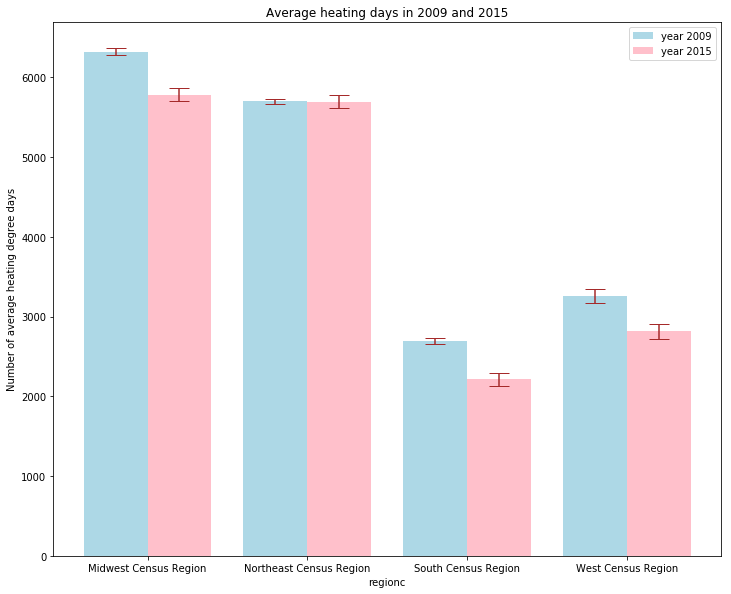

In [46]:
width = 0.4
fig1, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(10,8))
fig1.tight_layout()
_ = plt.bar(x = np.arange(len(labels)) - width / 2, 
            height = merged_2009['avg_hdd'], 
            color = 'lightblue',
            label ='year 2009',
            width = width, 
            align = 'center',
            yerr = merged_2009['hdd_region_sd'],
            ecolor = 'brown',
            capsize=10
           )
## show the label
_ = plt.legend(loc=1)
_ = plt.bar(x = np.arange(len(labels)) + width / 2, 
            height = merged_2015['avg_hdd'], 
            color = 'pink',
            label = 'year 2015',
            width = width, 
            align = 'center',
            yerr = merged_2015['hdd_region_sd'],
            ecolor = 'brown', 
            capsize=10
            )
## show the label
_ = plt.legend(loc=1)
_ = plt.xticks(np.arange(len(labels)), labels)
_ = ax1.set_xlabel('regionc')
_ = plt.ylabel('Number of average heating degree days')
_ = plt.title('Average heating days in 2009 and 2015')

We can see that the number of average heating degree days are decreasing.

Draw a bar and errorbar plot about average cooling degree days comparing 2009 and 2015.

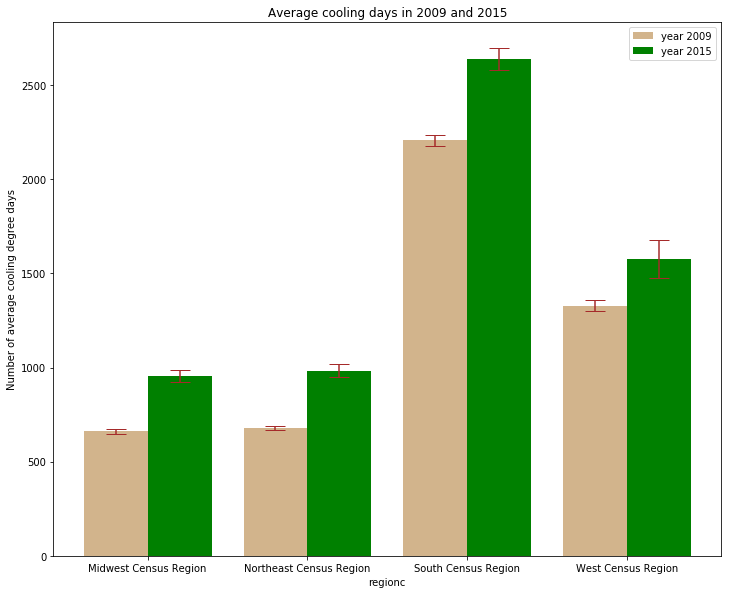

In [47]:
width = 0.4
fig1, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(10,8))
fig1.tight_layout()
_ = plt.bar(x = np.arange(len(labels)) - width / 2, 
            height = merged_2009['avg_cdd'], 
            color = 'tan',
            label ='year 2009',
            width = width, 
            align = 'center',
            yerr = merged_2009['cdd_region_sd'],
            ecolor = 'brown',
            capsize=10
           )
## show the label
_ = plt.legend(loc=1)
_ = plt.bar(x = np.arange(len(labels)) + width / 2, 
            height = merged_2015['avg_cdd'], 
            color = 'green',
            label = 'year 2015',
            width = width, 
            align = 'center',
            yerr = merged_2015['cdd_region_sd'],
            ecolor = 'brown', 
            capsize=10
            )
## show the label
_ = plt.legend(loc=1)
_ = plt.xticks(np.arange(len(labels)), labels)
_ = ax1.set_xlabel('regionc')
_ = plt.ylabel('Number of average cooling degree days')
_ = plt.title('Average cooling days in 2009 and 2015')

We can see that the number of average cooling degree days are rising.

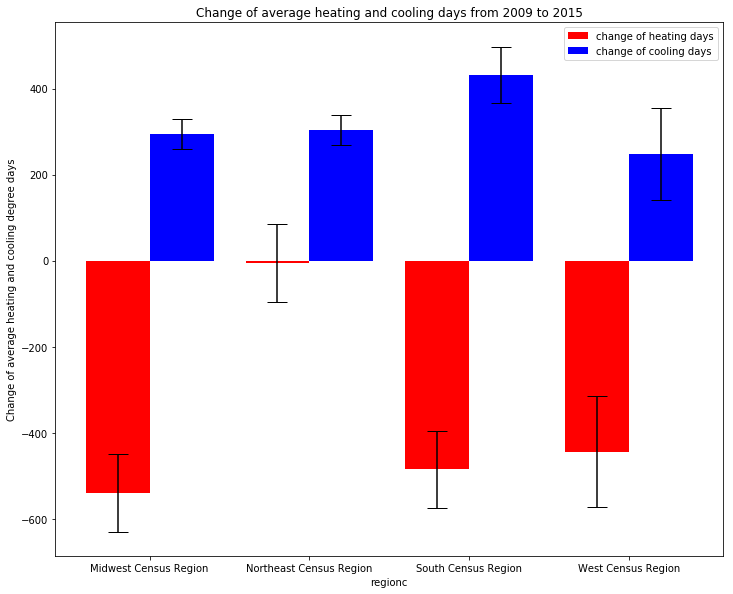

In [48]:
width = 0.4
fig1, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(10,8))
fig1.tight_layout()
_ = plt.bar(x = np.arange(len(labels)) - width / 2, 
            height = change_data['change of heating days'], 
            color = 'red',
            label ='change of heating days',
            width = width, 
            align = 'center',
            yerr = change_data['se_delta_hdd'],
            ecolor = 'black',
            capsize=10
           )
## show the label
_ = plt.legend(loc=1)
_ = plt.bar(x = np.arange(len(labels)) + width / 2, 
            height = change_data['change of cooling days'], 
            color = 'blue',
            label = 'change of cooling days',
            width = width, 
            align = 'center',
            yerr = change_data['se_delta_cdd'],
            ecolor = 'black', 
            capsize=10
            )
## show the label
_ = plt.legend(loc=1)
_ = plt.xticks(np.arange(len(labels)), labels)
_ = ax1.set_xlabel('regionc')
_ = plt.ylabel('Change of average heating and cooling degree days')
_ = plt.title('Change of average heating and cooling days from 2009 to 2015')

Growing number of average cooling degree days and decreasing number of average heating degree days illustrate the global warming effect!